# Dementia Data Analysis 

중앙대학교병원 신경과 윤영철 교수님 치매 과제 1차 Sample 분석용 Jupyter입니다.  
작성자/작성일 : 이나혁, 2020년 8월 20일

## <1> Data Preprocessing

In [193]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [194]:
# utf-8 코덱을 decode할 수 없으므로 cp949 encoding 설정 수행
data_table = pd.read_csv('SNSB_figure.csv', encoding='CP949')

In [195]:
# Data 정보 확인
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Hospital_No                      2229 non-null   object 
 1   Age                              2231 non-null   int64  
 2   sex                              2231 non-null   int64  
 3   education                        2230 non-null   object 
 4   edu_years                        2231 non-null   float64
 5   Rey_CFT_copy_score               2211 non-null   float64
 6   Rey_CFT_copy_score_p             2211 non-null   float64
 7   Alternating_square_and_triangle  2054 non-null   object 
 8   Luria_loop                       2051 non-null   object 
 9   K_MMSE_drawing                   2219 non-null   float64
 10  K_MMSE_drawing_p                 2219 non-null   object 
 11  CDR                              2213 non-null   float64
 12  Sum_of_boxes        

- <b>Total Data Row</b> : 2230개(Feature Row 제외)
- <b>결측치가 존재하는 Column</b> : Hospital No, education, Rey_CFT_copy_score, Rey_CFT_copy_score_p, Alternating_square_and_triangle, Luria_loop, K_MMSE_drawing, K_MMSE_drawing_p, CDR, Sum_of_boxes

In [196]:
# Data Sample 5개 조회
data_table.head(5)

,Hospital_No,Age,sex,education,edu_years,Rey_CFT_copy_score,Rey_CFT_copy_score_p,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_MMSE_drawing_p,CDR,Sum_of_boxes
0,938443,75,0,대졸,14.0,17.0,0.00,Normal,Normal,1.0,2.44≤,1.0,8.0
1,1407055,85,1,고중퇴,11.0,1.5,0.00,Normal,Normal,1.0,7.51≤,1.0,6.0
2,970997,80,0,고졸,12.0,36.0,88.34,Normal,Normal,1.0,5.53≤,0.5,1.5
3,991395,75,0,초4~6년,6.0,26.0,31.10,Normal,Normal,0.0,<17.46,0.5,2.5
4,891889,73,0,고졸,12.0,18.0,0.00,Normal,Normal,1.0,3.31≤,0.5,2.5


## Data Encoding

<b>Encoding 할 Feature</b> : Alternating_square_and_triangle, Luria_loop

<b>Object Dtype</b> : education, Alternating_square_and_triangle, Luria_loop, K_MMSE_drawing_p	

In [197]:
# 대략적인 Data 분포 확인
data_table.describe()

,Age,sex,edu_years,Rey_CFT_copy_score,Rey_CFT_copy_score_p,K_MMSE_drawing,CDR,Sum_of_boxes
count,2231.000000,2231.000000,2231.000000,2211.000000,2211.000000,2219.000000,2213.000000,2206.000000
mean,71.789332,0.370686,8.603541,25.252261,34.992533,0.657503,0.653163,3.321850
std,9.917349,0.483097,5.163496,10.098891,31.799450,0.474652,0.346833,2.310283
min,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,6.000000,18.500000,1.600000,0.000000,0.500000,2.000000
50%,74.000000,0.000000,8.000000,29.000000,28.760000,1.000000,0.500000,2.500000
75%,79.000000,1.000000,12.000000,33.375000,65.400000,1.000000,0.500000,4.000000
max,90.000000,1.000000,18.000000,36.000000,91.360000,1.000000,3.500000,16.000000


In [198]:
# 분석에 쓰이지 않는 Feature 제거
data_table.drop(['Hospital_No'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['education'], axis=1, inplace=True) # edu_y
data_table.drop(['K_MMSE_drawing_p'], axis=1, inplace=True)
data_table.drop(['Sum_of_boxes'], axis=1, inplace=True)

data_table.head(3)

,Age,sex,edu_years,Rey_CFT_copy_score,Rey_CFT_copy_score_p,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,CDR
0,75,0,14.0,17.0,0.00,Normal,Normal,1.0,1.0
1,85,1,11.0,1.5,0.00,Normal,Normal,1.0,1.0
2,80,0,12.0,36.0,88.34,Normal,Normal,1.0,0.5


In [199]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

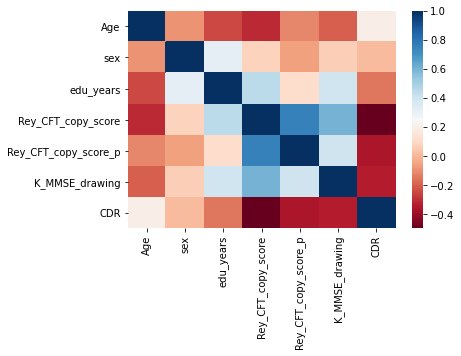

In [201]:
# 피처 상관관계 히트맵
corr = data_table.corr()
sns.heatmap(corr, cmap='RdBu')

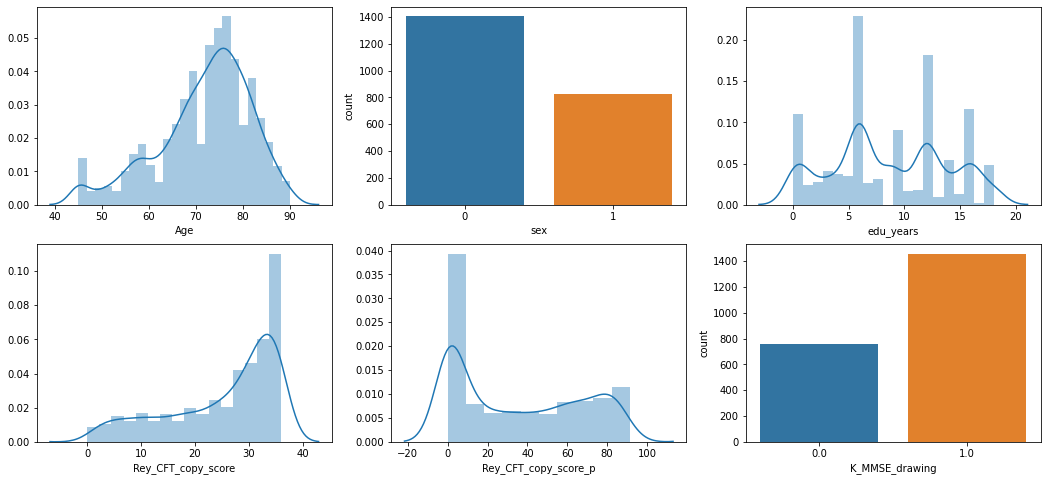

In [192]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.distplot(data_table['Age'], ax=ax1)
sns.countplot(x="sex", data=data_table, ax=ax2)
sns.distplot(data_table['edu_years'], ax=ax3)
sns.distplot(data_table['Rey_CFT_copy_score'], ax=ax4)
sns.distplot(data_table['Rey_CFT_copy_score_p'], ax=ax5)
sns.countplot(x="K_MMSE_drawing", data=data_table, ax=ax6)